
# Multiple Linear Regression

Assuming simple linear regression has been covered

DHL offers a same-day delivery service. You are able to use Google maps to group individual dleiveries into one trip. Some trips have more than one delivery. You want to estimate how long a delivery will take based on:
1. Total distance of the trip in km
2. The number of deliveries that must be made during the trip 

To conduct the analysis, take a random sample of 10 past trips and record:
1. Total kilometres travelled
2. Number of deliveries
3. Total time in hours

|kilometres_travelled(x_1)|#deliveries(x_2)|travel_time(hrs, y)|
|---|---|---|
|89|4|7|
|66|1|5.4|
|78|3|6.6|
|111|6|7.4|
|44|1|4.8|
|77|3|6.4|
|80|3|7|
|66|2|5.6|
|109|5|7.3|
|76|3|6.4|


In what way does travel time depend on the other two variables?
Travel time is the dependent variable also sometimes called response, and kilometres travelled and number of deliveries are independent variables also called predictor.

New considerations:
1. Adding more independent variables to a multiple linear regression does not mean it will be "better" or offer better predictions, in fact it can make things worse. This is called overfitting.
2. The addition of more independent variables creates more relationships between the variables. So not only are the independent variables potentially related to the dependent variables, they are also potentially related to each other. When this happens it is called multi-colinearlity.
3. The ideal is all of the independent variables to be correlated with the dependent variable but NOT with each other.
4. Because of multi-colinearity and overfitting, we have some prep work to do before we can do multiple linear regression.
- Clean data
- Correlations
- Scatter plots
- Simple linear regressions between the independent variables and the dependent variables

If two independent variables are related to each other we are not sure which one is explaining the variation in the dependent variable.
Important to consider which independent variables make the cut.
Some independent variables, or sets of independent variables, are better at predicting the dependent variable than others. Some contribute nothing.

Multiple regression model.

$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p + \epsilon$

Mutliple regression equation

$ E(y) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_px_p$

Estimated multiple regression equation

$ \hat{y} = b_0 + b_1x_1 + b_2x_2 + \dots + b_px_p$

$\hat{y} = 6.211 + 0.014x_1 + 0.383x_2 - 0.607x_3$

$\hat{y} = 27 + 9x_1 + 12x_2$

$x_1$ = capital investment (€1,000's)

$x_2$ = marketing expenditures

$\hat{y}$ = predicted sales 

**Review**
1. Multiple linear regression is an extension of simple linear regression.
2. Two or more independent variables are used to predict/explain the variance in one dependent variable
3. Two problems can arise:
- Overfitting
- Multi-cloinearity
4. Overfitting is caused by adding too many independent variables; they account for more variance but they add nothing to the model
5. Multi-colinearity happens some or all of the independent variables are correlated to each other
6. In multiple regression, each coefficient is interpreted as the estimated change in y corresponding to a one unit change in a variable, when all the other variables are held constant.

As the owner of DNL you would like to be able to estimate how long a delivery will take based on three factors:
1. The total distance of the trip in kilometers
2. The number of deliveries
3. The daily price of petrol

Steps for multiple linear regression:
1. Generate a list of potential variables; independents and dependent
2. Collect data on the variables
3. Check the relationships between each independent variable and the dependent variable using scatterplots and correlations
4. Check the relationships among the independent variables using scatter plots and correlations
5. (Optional) Conduct simple linear regressions for each IV/DV pair
6. Use the non-redundant independent variables in the analysis to find the best fitting model
7. Use the model to make predictions about the dependent variable

Data
|kilometres_travelled(x_1)|#deliveries(x_2)|petrol price (x_3)|travel_time(hrs, y)|
|---|---|---|---|
|89|4|3.84|7|
|66|1|3.19|5.4|
|78|3|3.78|6.6|
|111|6|3.89|7.4|
|44|1|3.57|4.8|
|77|3|3.57|6.4|
|80|3|3.03|7|
|66|2|3.51|5.6|
|109|5|3.54|7.3|
|76|3|3.25|6.4|

In [1]:
km_travelled = [89, 66, 78, 111, 44, 77, 80, 66, 109, 76]
time_taken = [7, 5.4, 6.6, 7.4, 4.8, 6.4, 7, 5.6, 7.3, 6.3]

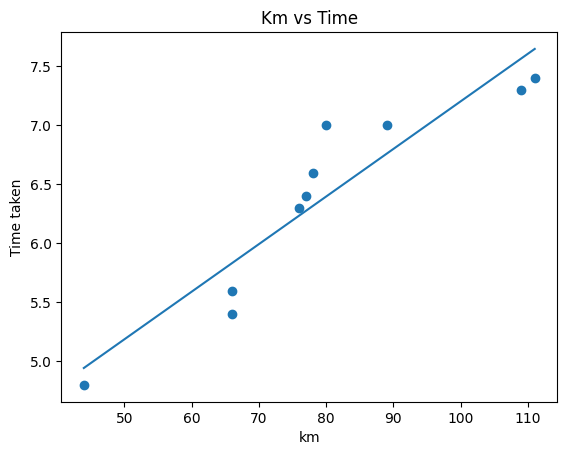

In [2]:
from matplotlib import pyplot as plt
import numpy as np
plt.title("Km vs Time")
plt.xlabel("km")
plt.ylabel("Time taken")
plt.scatter(km_travelled, time_taken)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, time_taken, 1))(np.unique(km_travelled)))
plt.show()

In [4]:
deliveries = [4, 1, 3, 6, 1, 3, 3, 2, 5, 3]
petrol = [3.84, 3.19, 3.78, 3.89, 3.57, 3.57, 3.03, 3.51, 3.54, 3.25]

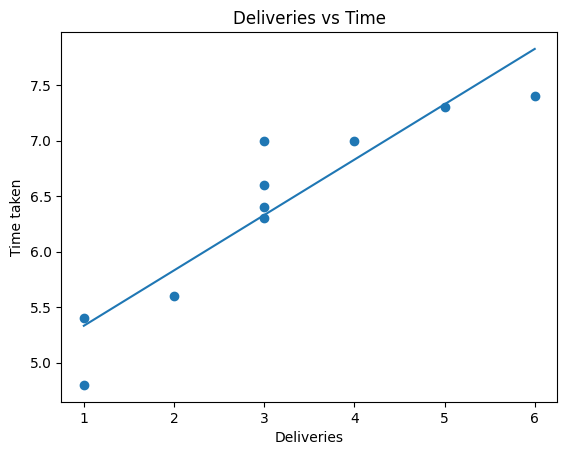

In [5]:
plt.title("Deliveries vs Time")
plt.xlabel("Deliveries")
plt.ylabel("Time taken")
plt.scatter(deliveries, time_taken)
plt.plot(np.unique(deliveries), np.poly1d(np.polyfit(deliveries, time_taken, 1))(np.unique(deliveries)))
plt.show()

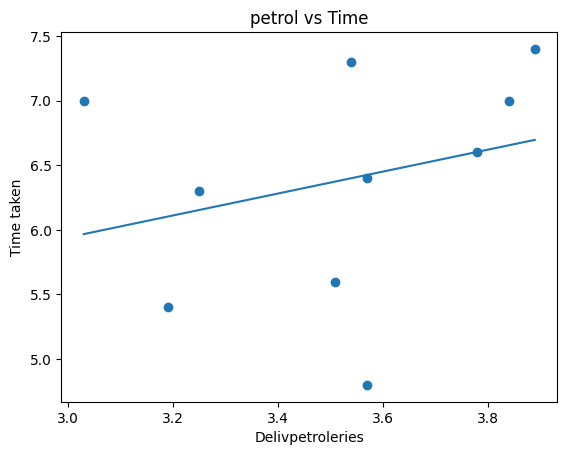

In [6]:
plt.title("petrol vs Time")
plt.xlabel("Delivpetroleries")
plt.ylabel("Time taken")
plt.scatter(petrol, time_taken)
plt.plot(np.unique(petrol), np.poly1d(np.polyfit(petrol, time_taken, 1))(np.unique(petrol)))
plt.show()

**Scatterplot Summary**
1. Travel time appears to be highly correlated with the km_travelled and there is a stong linear relationship
2. Travel time appears to be highly correlated with the number of deliveries and there is a strong linear relationship
3. Travel time does not appear highly correlated with petrol prices and they do not have any linear relationship

**Correlations**
Perfect or very strong association 0.8-1.0
Strong 0.6-0.8
Moderate 0.4-0.6
Weak 0.2-0.4
Very weak or none 0.0 - 0.2

Since petrol prices do not appear to be correlated with the dependent variable I would not use petrol prices and just remove from the analysis. For learning purposes I will leave it in for now.

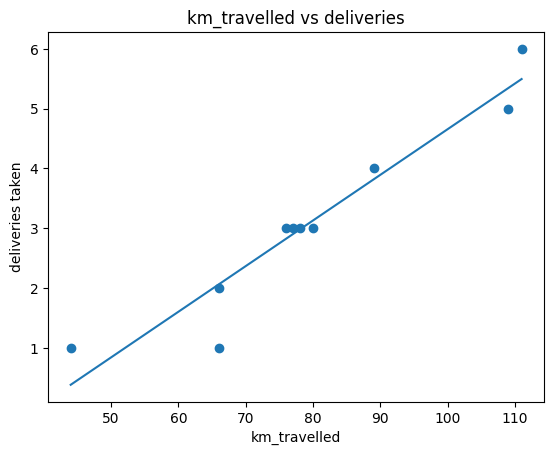

In [7]:
plt.title("km_travelled vs deliveries")
plt.xlabel("km_travelled")
plt.ylabel("deliveries taken")
plt.scatter(km_travelled, deliveries)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, deliveries, 1))(np.unique(km_travelled)))
plt.show()

This is very problematic as it shows strong multi-colinearity. I would remove whichever variable has the lower correlation with the dependent variable. For now leave it in for learning purpose.

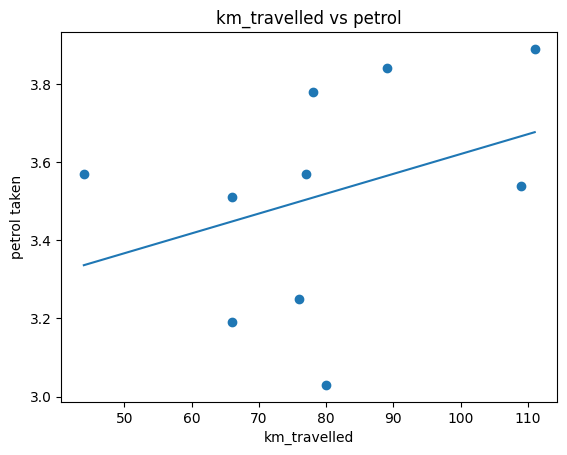

In [8]:
plt.title("km_travelled vs petrol")
plt.xlabel("km_travelled")
plt.ylabel("petrol taken")
plt.scatter(km_travelled, petrol)
plt.plot(np.unique(km_travelled), np.poly1d(np.polyfit(km_travelled, petrol, 1))(np.unique(km_travelled)))
plt.show()

This is the sort of relationship (none) that we want between oir independent variables. Good.

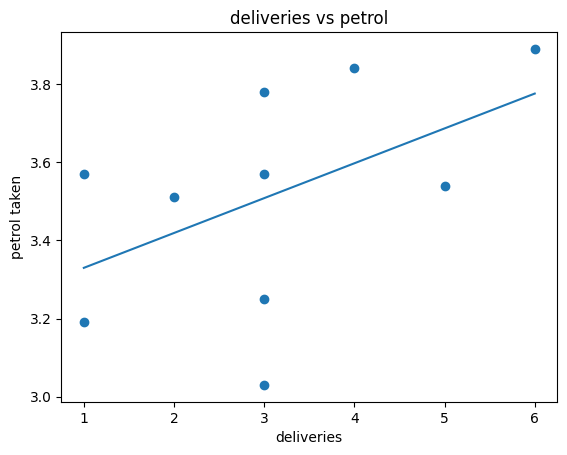

In [9]:
plt.title("deliveries vs petrol")
plt.xlabel("deliveries")
plt.ylabel("petrol taken")
plt.scatter(deliveries, petrol)
plt.plot(np.unique(deliveries), np.poly1d(np.polyfit(deliveries, petrol, 1))(np.unique(deliveries)))
plt.show()

Again this is good. No correlation.

**Summary of IV-IV scatterplots**
1. deliveries appears to be highly correlated with km_travelled. Multi-colinearity, a big problem.
2. km_travelled does not appear to be correlated with petrol. This is good.
3. deliveries does not appear to be correlated with petrol. This is good.

In [11]:
from scipy.stats import pearsonr
corr = pearsonr(km_travelled, time_taken)
print(corr)

PearsonRResult(statistic=np.float64(0.9300044244943915), pvalue=np.float64(9.645099489944713e-05))
